In [1]:
from matplotlib.ticker import MaxNLocator
import numpy as np
from hmmlearn import hmm
import csv
import matplotlib.pyplot as plt
import sys
from BW import *
import sys
sys.setrecursionlimit(1000000)
import datetime
from matplotlib.lines import Line2D

# Creating a discrete HMM with 2 hidden and 2 visible states

In [2]:
states = ["H1","H2"]
n_states = len(states)

observations = ["V1", "V2"]
n_observations = len(observations)
model = hmm.CategoricalHMM(n_components=n_states,n_iter=1000,tol=1e-15,init_params=" ",params="te")

# Example-1a
## Baum-Welch (Example-1a)

In [3]:
start_probability = np.array([0.5,0.5])

transition_probability=np.array([[0.2, 0.8],
       [0.7, 0.3]])

emission_probability = np.array([[0.75, 0.25],
       [0.3, 0.7]])
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability
np.random.seed(77)
X, Z = model.sample(100)
for i in range(len(X.T[0])):
    print('v_'+repr(X.T[0][i]),end=',')
    if (i+1)%25==0:
        print(" \\\ ")

v_1,v_0,v_1,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_0, \\ 
v_1,v_1,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_1,v_1,v_0,v_0,v_0,v_1,v_1,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1, \\ 
v_1,v_1,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_1, \\ 
v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_1,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_1,v_1,v_1, \\ 


In [4]:
model.score(X.T.reshape(-1,1))

-68.79552007287361

Starting from Uniform Distribution of parameters

In [5]:
tA=np.array([[0.5,0.5],[0.5,0.5]])
tB=np.array([[0.5,0.5],[0.5,0.5]])
model.transmat_=tA
model.emissionprob_=tB

Checking the log-likelihood of Initial uniform distribution

In [6]:
model.score(X.T.reshape(-1,1))

-69.31471805599459

Fitting the HMM and monitoring the convergence with Baum-Welch Algorithm

In [7]:
model=model.fit(X)
model.monitor_

ConvergenceMonitor(
    history=[-69.31471805599459, -69.29471672244782, -69.29471672244782],
    iter=3,
    n_iter=1000,
    tol=1e-15,
    verbose=False,
)

In [8]:
model.monitor_.converged

True

In [9]:
print("Fitted Parameters Tehta,Psi")
print(np.round(model.transmat_,3))
print(np.round(model.emissionprob_,3))

Fitted Parameters Tehta,Psi
[[0.5 0.5]
 [0.5 0.5]]
[[0.51 0.49]
 [0.51 0.49]]


Plotting the Log-Likelihood of the fitting trajectory

[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
-69.31471805599459


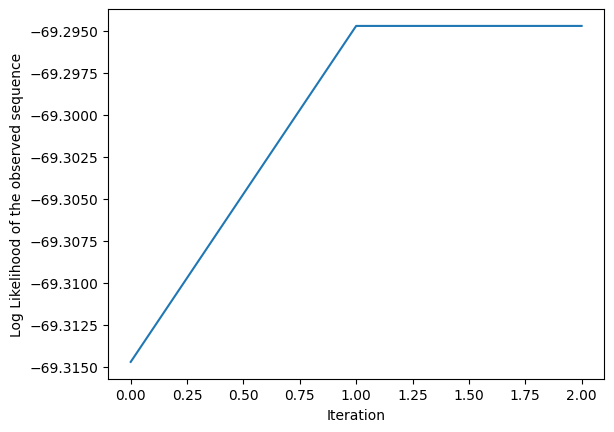

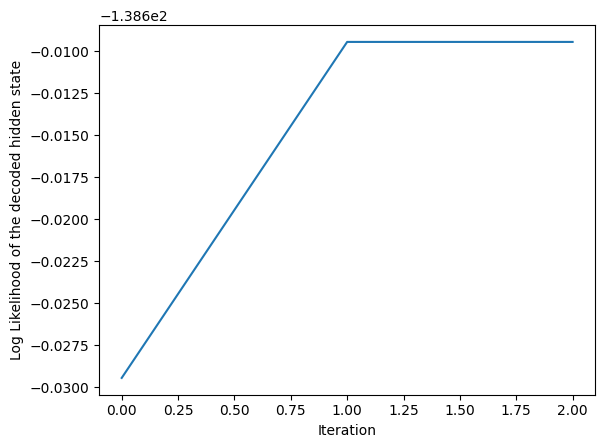

In [10]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,3)

## Chemical Baum Welch (Example 1a)

In [11]:
from crnsimulator import ReactionGraph
from IPython.display import Image
import numpy as np
from HMMCRN import *
import crnsimulator

Creating the Reaction System

In [12]:
R=HMMCRN(['H1','H2'],['V1','V2'])
R.Ob=X
Tr=R.EM()
RG=ReactionGraph(Tr)

Creating the Ode Simulation File

In [13]:
%%time
filename,odename=RG.write_ODE_lib(filename='ReactionSimulator.py')

CPU times: user 1min 5s, sys: 1.32 s, total: 1min 6s
Wall time: 1min 6s


### Initializing the Odes (Setting CRN Concentrations)
The function uni_init() is used to initialize all the species with uniform distribution

In [14]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(X)
#I=BW_init(theta0,tA,tB,X.T[0])
I=uni_init(n,m,X.T[0])
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

Running the reaction network simulation with Nuskell CRNsimulatorm

In [15]:
!python ReactionSimulator.py --a 1e-3 --r 1e-3 --t8 1 --t-lin 100 --nxy>100.dat

Printing the Chemical Baum-Welch CRN likelihood Trajectories and parameters

CRN initialization
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.5 0.5]
 [0.5 0.5]]

CRN Equilibrium
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.51 0.49]
 [0.51 0.49]]


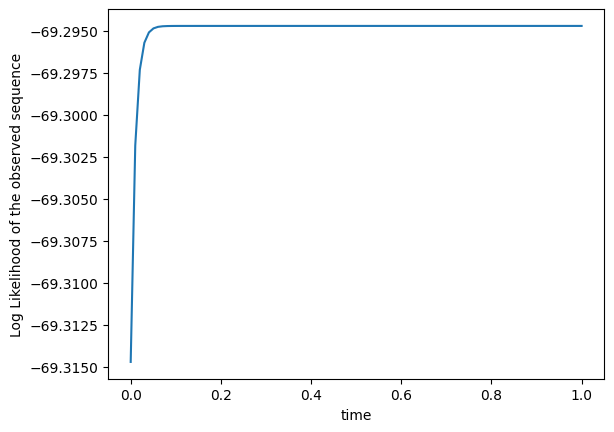

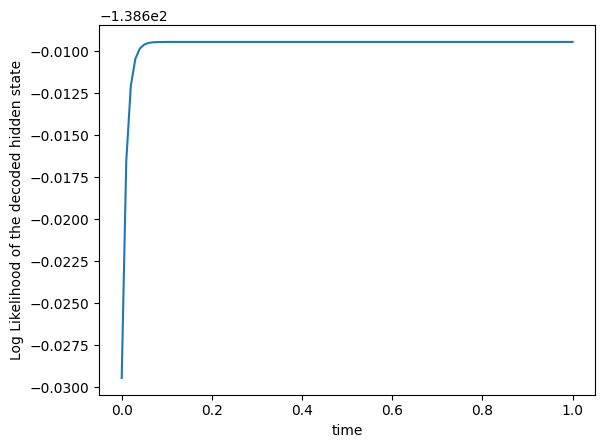

-69.2947167224477
CRN_Transition fit:
 [[0.5 0.5]
 [0.5 0.5]]
 
CRN_Emission fit:
 [[0.51 0.49]
 [0.51 0.49]]


In [16]:
Final=!tail -n 2 100.dat
Init=!head -n 2 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,X)

### Plotting Data

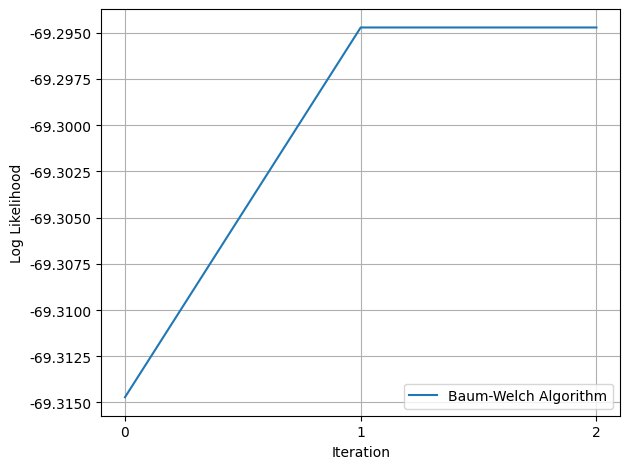

In [17]:
#Plotting BW Likelihood Trajectories
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_initBW.pdf', format='pdf', dpi=1000)
plt.show()

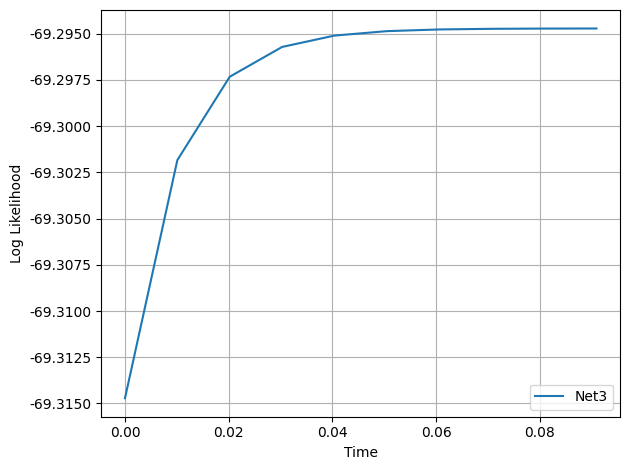

In [18]:
#Plotting CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(t1[:10],c1L[:10], label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

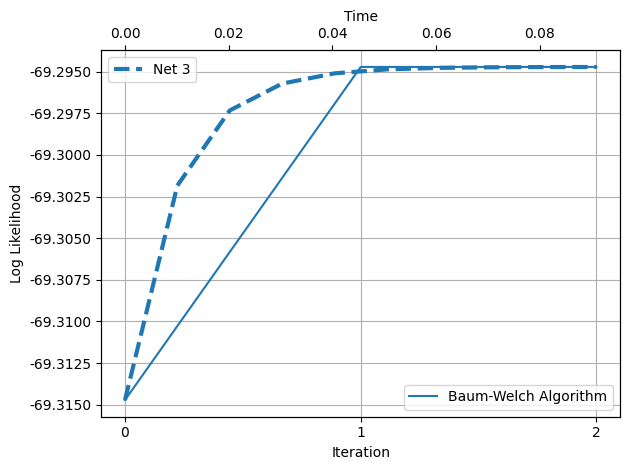

In [19]:
#Plotting BW and CRN Likelihood Trajectories Together (time is scaled to fit the plots)
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
#ax1.set_facecolor('white')
ax1.grid(True)
ax2.grid(False)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax2.plot(t1[:10],c1L[:10],'--',linewidth=3, label=r'Net 3')
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Time')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='lower right')
ax2.legend(loc='best')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_init-mix.pdf', format='pdf', dpi=1000)
plt.show()

# Example-1b
### Setting randomly distributed parameter concentrations on the previous network for Example-1b

In [20]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(X)
I=ran_init(n,m,X.T[0],seed=41)
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

Running the Odes from Nuskell CRNSimulator

In [21]:
%%time
!python ReactionSimulator.py --a 1e-6 --r 1e-6 --t8 5500 --t-lin 100 --nxy>100.dat

CPU times: user 1.05 s, sys: 292 ms, total: 1.34 s
Wall time: 1min 28s


Printing the CRN simulation results

CRN initialization
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.77409994 0.22590006]
 [0.42733296 0.57266704]]
Emission:
 [[0.91602762 0.08397238]
 [0.51010622 0.48989378]]

CRN Equilibrium
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.    1.   ]
 [0.228 0.772]]
Emission:
 [[-0.    1.  ]
 [ 0.63  0.37]]


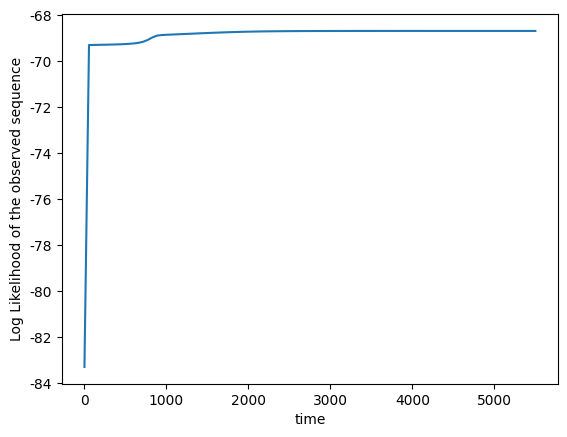

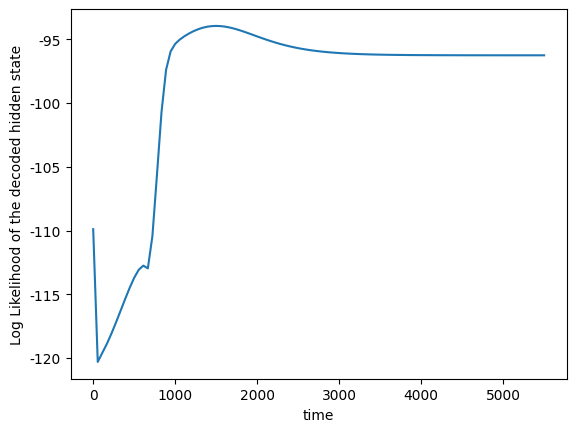

-68.67525892722414
CRN_Transition fit:
 [[0.    1.   ]
 [0.228 0.772]]
 
CRN_Emission fit:
 [[0.   1.  ]
 [0.63 0.37]]


In [22]:
Final=!tail -n 1 100.dat
Init=!head -n 1 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,X)

#### Running the Baum-Welch for comparison
Setting the parameters for HMMlearn Package

In [23]:
tA,tB=np.array([[0.77409994,0.22590006],[0.42733296,0.57266704]]),np.array([[0.91602762,0.08397238],[0.51010622,0.48989378]])
model.transmat_=tA
model.emissionprob_=tB
model.score(X.T.reshape(-1,1))

-83.30064135554429

In [24]:
%%time
model=model.fit(X)
model.monitor_
print("Model Converged: ",model.monitor_.converged)
print("Fitted Parameters Tehta,Psi")
print(np.round(tA,3),'\n',np.round(tB,3))

Model Converged:  True
Fitted Parameters Tehta,Psi
[[0.774 0.226]
 [0.427 0.573]] 
 [[0.916 0.084]
 [0.51  0.49 ]]
CPU times: user 300 ms, sys: 7.05 ms, total: 307 ms
Wall time: 307 ms


Plotting the Log-Likelihood of the fitting trajectory

[[0.774 0.226]
 [0.427 0.573]]
[[0.916 0.084]
 [0.51  0.49 ]]
-83.30064135554429


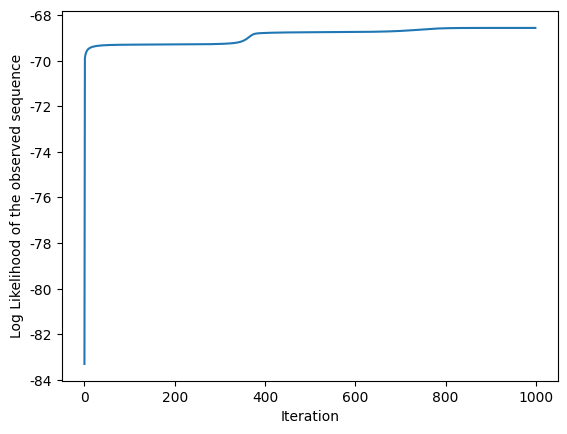

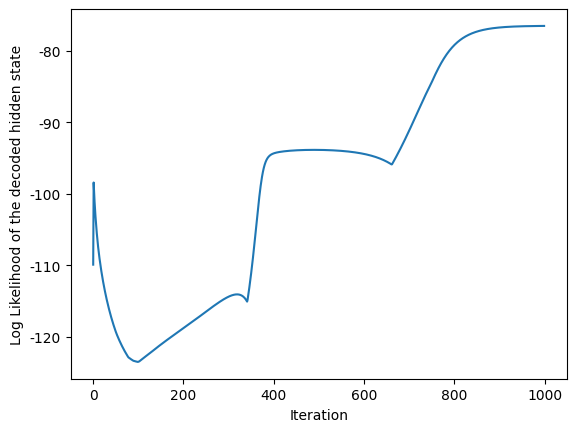

In [25]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,1000)

## Plotting Data

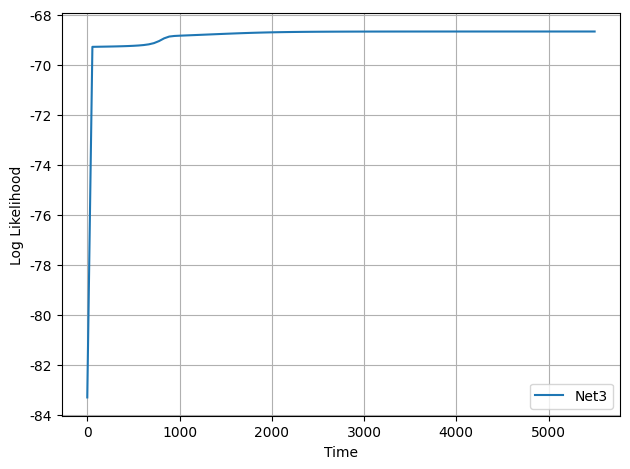

In [26]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(t1,c1L, label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100ran_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

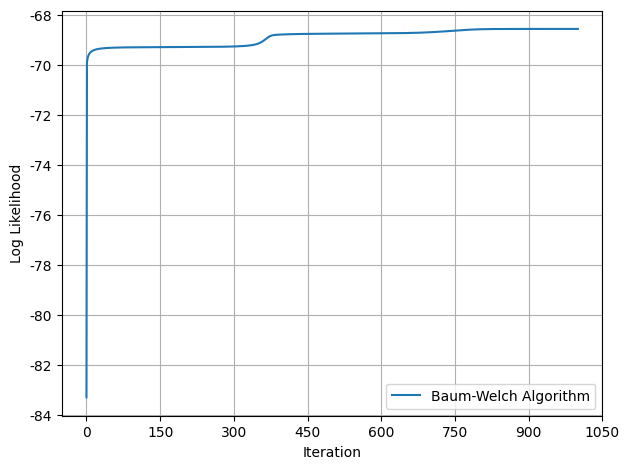

In [27]:
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,1000,1000),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend()
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100ran_initBW.pdf', format='pdf', dpi=1000)
plt.show()

In [28]:
import session_info
session_info.show()

# Example 3

In [29]:
%%time
X=np.array([1,0,1,0,1])
R=HMMCRN(['H1','H2'],['V1','V2'])
R.Ob=X
Tr=R.EM()
RG=ReactionGraph(Tr)
filename,odename=RG.write_ODE_lib(filename='ReactionSimulator2.py')

CPU times: user 1.82 s, sys: 56.4 ms, total: 1.88 s
Wall time: 1.88 s


In [30]:
theta0=np.array([0.6,0.4])
theta=np.array([[0.7,0.3],[0.4,0.6]])
psi=np.array([[0.6,0.4],[0.6,0.4]])
n=2
m=2
l=len(X)
I=BW_init(theta0,theta,psi,X)
start=init_simulator(n,m,l,I,'ReactionSimulator2.py')

In [31]:
%%time
!python ReactionSimulator2.py --a 1e-6 --r 1e-6 --t8 5500 --t-lin 100 --nxy>101.dat

CPU times: user 8.8 ms, sys: 12.8 ms, total: 21.6 ms
Wall time: 615 ms


CRN initialization
Starting Prob:
 [0.6 0.4]
Transition:
 [[0.7 0.3]
 [0.4 0.6]]
Emission:
 [[0.6 0.4]
 [0.6 0.4]]

CRN Equilibrium
Starting Prob:
 [0.6 0.4]
Transition:
 [[ 0.116  0.884]
 [ 1.    -0.   ]]
Emission:
 [[ 0.  1.]
 [ 1. -0.]]


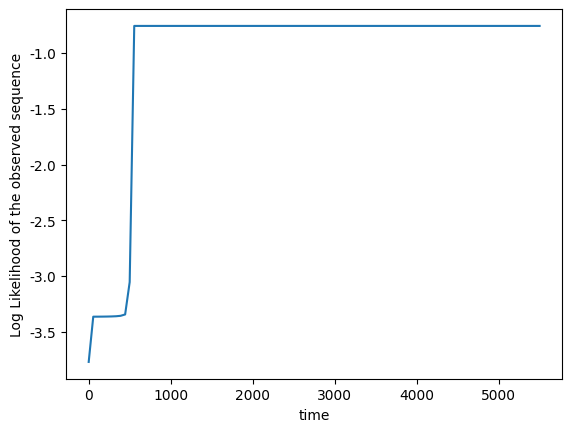

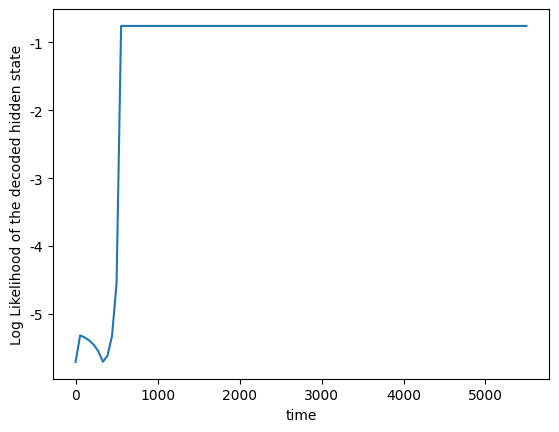

-0.7569881460618761
CRN_Transition fit:
 [[0.116 0.884]
 [1.    0.   ]]
 
CRN_Emission fit:
 [[0. 1.]
 [1. 0.]]


In [32]:
Final=!tail -n 2 101.dat
Init=!head -n 2 101.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('101.dat',start,X.reshape(-1, 1))

In [33]:
model.start_=theta0
model.transmat_=theta
model.emissionprob_=psi
model.score(X.T.reshape(-1,1))

-3.7705234431544463

In [34]:
%%time
model=model.fit(X.T.reshape(-1,1))
model.monitor_
print("Model Converged: ",model.monitor_.converged)
print("Fitted Parameters Tehta,Psi")
print(np.round(tA,3),'\n',np.round(tB,3))

Model Converged:  True
Fitted Parameters Tehta,Psi
[[0.774 0.226]
 [0.427 0.573]] 
 [[0.916 0.084]
 [0.51  0.49 ]]
CPU times: user 10.7 ms, sys: 2.32 ms, total: 13 ms
Wall time: 12.1 ms


[[0.7 0.3]
 [0.4 0.6]]
[[0.6 0.4]
 [0.6 0.4]]
-3.7705234431544463


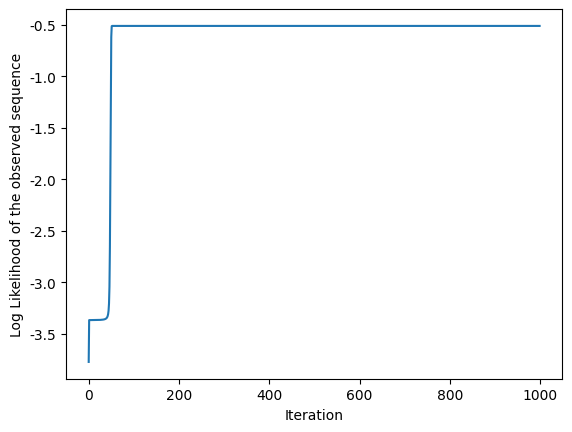

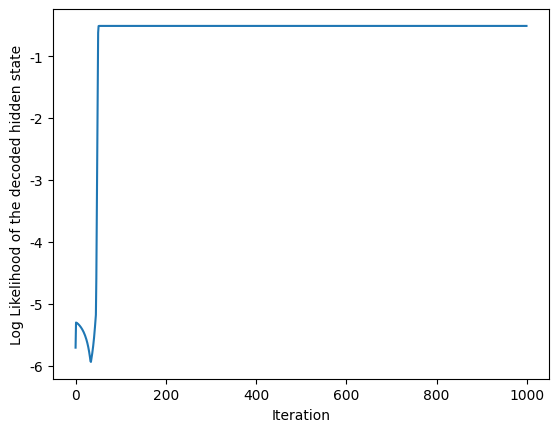

In [35]:
L1=BWlib(np.copy(theta0),np.copy(theta),np.copy(psi),X.T.reshape(-1,1),1000)